In [1]:
import pandas as pd  # For displaying the data after
import matplotlib.pyplot as plt  # for plotting data
from src.twitter_util import TwitterApiGetter
from src.persistance_util import export_container_to_csv
from config import PANDEMICS_WORDS

In [2]:
twg = TwitterApiGetter()
minister_bios = twg.get_all_minister_twitter_bios(
    custom_user_fields=[
        "created_at",
        "description",
        "id",
        "location",
        "name",
        "public_metrics",
        "url",
        "username",
        "verified",
    ],
)
export_container_to_csv(container=minister_bios, path="data/minister_bios.csv")

INFO: 14/14 Twitter accounts of ministers with Twitter handles fetched.


In [3]:
minister_df = pd.read_csv("data/minister_bios.csv")
minister_df.head()

,url,id,name,verified,username,description,created_at,location,followers_count,following_count,tweet_count,listed_count,party
0,https://t.co/pDZ6VOLHnA,38150247,Olaf Scholz,True,OlafScholz,Hier twittert das Team Olaf Scholz.,2009-05-06T10:08:02.000Z,"Berlin, Deutschland",350964,1438,6486,1994,spd
1,https://t.co/QyGCyDDccr,20593301,Volker Wissing,True,Wissing,"Bundesminister für Digitales und Verkehr, Vors...",2009-02-11T14:34:58.000Z,"Schillerstraße 11a, 55116 Mainz",31305,998,13162,621,fdp
2,https://t.co/mJgVJTabCr,122104353,Christian Lindner,True,c_lindner,Bundesminister der Finanzen. Bundesvorsitzende...,2010-03-11T16:11:51.000Z,"Berlin, Deutschland",550142,1371,17690,2409,fdp
3,https://t.co/aNTUPwOxBp,3292982985,Prof. Karl Lauterbach,True,Karl_Lauterbach,"SPD Bundestagsabgeordneter, Bundesgesundheitsm...",2015-05-21T14:01:21.000Z,"Berlin, Deutschland",831453,296,9571,2838,spd
4,https://t.co/NnwHzin72J,2179010672,Annalena Baerbock (Archiv),True,ABaerbockArchiv,Dies ist ein Archiv des Twitter-Accounts von A...,2013-11-07T00:04:11.000Z,NaN,422912,1466,4489,1508,gruene


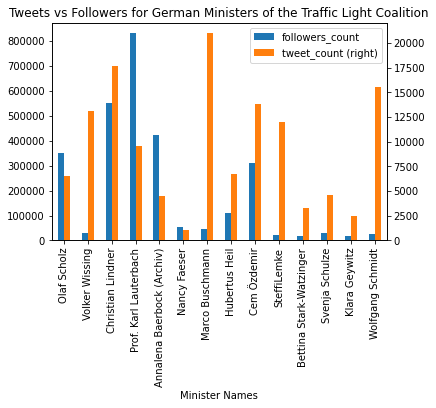

In [4]:
# Some visualization
tweet_ratio_plt = minister_df.plot(
    kind="bar",
    x="name",
    y=["followers_count", "tweet_count"],
    secondary_y="tweet_count",
)
tweet_ratio_plt.set_title(
    "Tweets vs Followers for German Ministers of the Traffic Light Coalition"
)
tweet_ratio_plt.set_xlabel("Minister Names")
plt.show()

In [5]:
party_stats_df = (
    minister_df.groupby(by=["party"])["followers_count", "tweet_count"]
    .mean()
    .sort_values(by=["followers_count", "tweet_count"], ascending=[False, True])
)
party_stats_df

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_59455/2881319713.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  minister_df.groupby(by=["party"])["followers_count", "tweet_count"]


,followers_count,tweet_count
party,,
gruene,251665.666667,10119.333333
spd,203021.142857,6652.428571
fdp,160502.000000,13775.000000


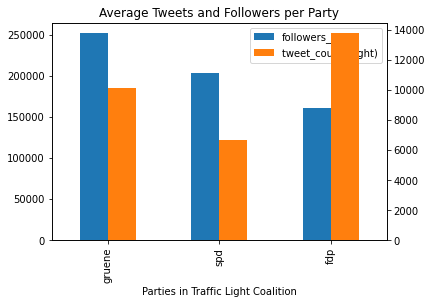

In [6]:
party_stats_plt = party_stats_df.plot(
    kind="bar", y=["followers_count", "tweet_count"], secondary_y="tweet_count"
)
party_stats_plt.set_title("Average Tweets and Followers per Party")
party_stats_plt.set_xlabel("Parties in Traffic Light Coalition")
plt.show()

In [7]:
all_tweets = []

minister_twitter_identifiers = minister_df[["id", "name"]].values.tolist()
for user_id, user_name in minister_twitter_identifiers:
    user_tweets = twg.fetch_user_tweets(user_id=user_id, user_name=user_name)
    all_tweets.extend(user_tweets)

print(f"fetched {len(all_tweets)} tweets in total.")
export_container_to_csv(container=all_tweets, path="data/minister_tweets.csv")

INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 75 tweets.
INFO [user Olaf Scholz ✋]: No next_token in response to further fetch data.
INFO [user Volker Wissing ✅]: Fetched 100 tweets.
INFO [user Volker Wissing ✅]: Fetched 100 tweets.
INFO [user Volker Wissing ✅]: Fetched 100 tweets.
INFO [user Volker Wissing ✅]: Fetched 100 tweets.
INFO [user Volker Wissing ✅]: Fetched 100 tweets.
INFO [user Volker

In [39]:
tweets_df = pd.read_csv("data/minister_tweets.csv")
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   public_metrics  16598 non-null  object
 1   id              16598 non-null  int64 
 2   entities        11145 non-null  object
 3   text            16598 non-null  object
 4   created_at      16598 non-null  object
 5   user_id         16598 non-null  int64 
 6   author          16598 non-null  object
dtypes: int64(2), object(5)
memory usage: 907.8+ KB


In [40]:
tweets_df["text"].head(10)

0    RT @wbuechner: #Kanzler @OlafScholz dankte heu...
1    RT @RegSprecher: Wir brechen auf in eine neue ...
2    Abermals heißt es zu Weihnachten: Kontakte red...
3    Mein Dank gilt dem #Expertenrat für die klare ...
4    Die Beschränkungen für Ungeimpfte bleiben – 3G...
5    Wir fordern die kritische Infrastruktur auf, i...
6    Die Impfkampagne wird auch über die Feiertage ...
7    Ich kann alle verstehen, die gerade vor Weihna...
8    Heute hat das Abgeordnetenhaus @FranziskaGiffe...
9    RT @RegSprecher: In Gedenken an die Opfer des ...
Name: text, dtype: object

In [41]:
# general info on tweet characterization
tweets_df["is_retweet"] = tweets_df["text"].str.match(r"RT\s@.+")
tweets_df["has_user_mention"] = tweets_df["entities"].isna() == False
tweets_df["text_lower"] = tweets_df["text"].str.lower()

In [42]:
# checking if tweet is about corona
pandemics_search_str = "|".join(PANDEMICS_WORDS)
tweets_df["covid_words_in_tweet"] = tweets_df["text_lower"].str.findall(
    r"{}".format(pandemics_search_str)
)
tweets_df["covid_words_in_tweet_cnt"] = tweets_df["covid_words_in_tweet"].apply(
    lambda word_list: len(word_list)
)

# check if user mentions other users or shares links to further sources
tweets_df["mentions_covid"] = tweets_df["covid_words_in_tweet_cnt"] > 0
links_search_str = "|".join(
    [".*https?://", ".*bitly", ".*goo.gl", ".*tinyurl", ".*ow.ly"]
)
tweets_df["links_in_tweet"] = (
    tweets_df["text_lower"].head(100).str.match(r"{}".format(links_search_str))
)

In [43]:
tweets_df.head(10)

,public_metrics,id,entities,text,created_at,user_id,author,is_retweet,has_user_mention,text_lower,covid_words_in_tweet,covid_words_in_tweet_cnt,mentions_covid
0,"{'retweet_count': 28, 'reply_count': 0, 'like_...",1478809222435463178,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",RT @wbuechner: #Kanzler @OlafScholz dankte heu...,2022-01-05T19:22:48.000Z,38150247,Olaf Scholz,True,True,rt @wbuechner: #kanzler @olafscholz dankte heu...,[],0,False
1,"{'retweet_count': 364, 'reply_count': 0, 'like...",1476965982350585860,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",RT @RegSprecher: Wir brechen auf in eine neue ...,2021-12-31T17:18:25.000Z,38150247,Olaf Scholz,True,True,rt @regsprecher: wir brechen auf in eine neue ...,[],0,False
2,"{'retweet_count': 293, 'reply_count': 2392, 'l...",1474344664207609859,NaN,Abermals heißt es zu Weihnachten: Kontakte red...,2021-12-24T11:42:14.000Z,38150247,Olaf Scholz,False,False,abermals heißt es zu weihnachten: kontakte red...,[],0,False
3,"{'retweet_count': 51, 'reply_count': 369, 'lik...",1473369051313455106,NaN,Mein Dank gilt dem #Expertenrat für die klare ...,2021-12-21T19:05:30.000Z,38150247,Olaf Scholz,False,False,mein dank gilt dem #expertenrat für die klare ...,[],0,False
4,"{'retweet_count': 50, 'reply_count': 231, 'lik...",1473369049966985222,NaN,Die Beschränkungen für Ungeimpfte bleiben – 3G...,2021-12-21T19:05:30.000Z,38150247,Olaf Scholz,False,False,die beschränkungen für ungeimpfte bleiben – 3g...,[],0,False
5,"{'retweet_count': 37, 'reply_count': 114, 'lik...",1473369048498987009,NaN,"Wir fordern die kritische Infrastruktur auf, i...",2021-12-21T19:05:29.000Z,38150247,Olaf Scholz,False,False,"wir fordern die kritische infrastruktur auf, i...",[pandemie],1,True
6,"{'retweet_count': 32, 'reply_count': 83, 'like...",1473369047060385800,NaN,Die Impfkampagne wird auch über die Feiertage ...,2021-12-21T19:05:29.000Z,38150247,Olaf Scholz,False,False,die impfkampagne wird auch über die feiertage ...,[impfung],1,True
7,"{'retweet_count': 245, 'reply_count': 1771, 'l...",1473369044996796434,NaN,"Ich kann alle verstehen, die gerade vor Weihna...",2021-12-21T19:05:28.000Z,38150247,Olaf Scholz,False,False,"ich kann alle verstehen, die gerade vor weihna...",[virus],1,True
8,"{'retweet_count': 74, 'reply_count': 539, 'lik...",1473272074315747335,"{'mentions': [{'start': 31, 'end': 47, 'userna...",Heute hat das Abgeordnetenhaus @FranziskaGiffe...,2021-12-21T12:40:09.000Z,38150247,Olaf Scholz,False,True,heute hat das abgeordnetenhaus @franziskagiffe...,[],0,False
9,"{'retweet_count': 186, 'reply_count': 0, 'like...",1472524476210368515,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",RT @RegSprecher: In Gedenken an die Opfer des ...,2021-12-19T11:09:27.000Z,38150247,Olaf Scholz,True,True,rt @regsprecher: in gedenken an die opfer des ...,[],0,False


In [44]:
covid_mentions_df = (
    tweets_df.groupby("author")["mentions_covid"].sum().rename("tweets_with_covid_cnt")
)
covid_mentions_df["tweets_without_covid_cnt"] = tweets_df.groupby("author")[
    "mentions_covid"
].count()
covid_mentions_df

author
Annalena Baerbock (Archiv)                                                   29
Bettina Stark-Watzinger                                                     146
Cem Özdemir                                                                 137
Christian Lindner                                                           179
Hubertus Heil                                                                80
Klara Geywitz                                                                 3
Marco Buschmann                                                             292
Nancy Faeser                                                                 36
Olaf Scholz                                                                 157
Prof. Karl Lauterbach                                                       988
SteffiLemke                                                                  51
Svenja Schulze                                                               24
Volker Wissing                   

In [45]:
tweets_stats_per_author_df = (
    tweets_df[["author", "mentions_covid"]].groupby("author").mean()
)
tweets_stats_per_author_df = tweets_stats_per_author_df["mentions_covid"].rename(
    "covid_tweets_share"
)
tweets_stats_per_author_df = tweets_stats_per_author_df.sort_values(ascending=True)

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_59455/709526410.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  covid_stats_plt.set_xticklabels(['{:,.2%}'.format(x) for x in covid_stats_plt.get_xticks()])


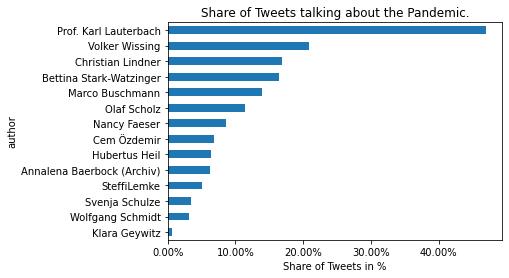

In [46]:
covid_stats_plt = tweets_stats_per_author_df.plot.barh(
    y="covid_tweets_share", title="Share of Tweets talking about the Pandemic."
)
covid_stats_plt.set_xlabel("Share of Tweets in %")
covid_stats_plt.set_xticklabels(
    ["{:,.2%}".format(x) for x in covid_stats_plt.get_xticks()]
)
plt.show()

In [47]:
# now lemmatization of words to make this even better
tweets_df.head()

,public_metrics,id,entities,text,created_at,user_id,author,is_retweet,has_user_mention,text_lower,covid_words_in_tweet,covid_words_in_tweet_cnt,mentions_covid
0,"{'retweet_count': 28, 'reply_count': 0, 'like_...",1478809222435463178,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",RT @wbuechner: #Kanzler @OlafScholz dankte heu...,2022-01-05T19:22:48.000Z,38150247,Olaf Scholz,True,True,rt @wbuechner: #kanzler @olafscholz dankte heu...,[],0,False
1,"{'retweet_count': 364, 'reply_count': 0, 'like...",1476965982350585860,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",RT @RegSprecher: Wir brechen auf in eine neue ...,2021-12-31T17:18:25.000Z,38150247,Olaf Scholz,True,True,rt @regsprecher: wir brechen auf in eine neue ...,[],0,False
2,"{'retweet_count': 293, 'reply_count': 2392, 'l...",1474344664207609859,NaN,Abermals heißt es zu Weihnachten: Kontakte red...,2021-12-24T11:42:14.000Z,38150247,Olaf Scholz,False,False,abermals heißt es zu weihnachten: kontakte red...,[],0,False
3,"{'retweet_count': 51, 'reply_count': 369, 'lik...",1473369051313455106,NaN,Mein Dank gilt dem #Expertenrat für die klare ...,2021-12-21T19:05:30.000Z,38150247,Olaf Scholz,False,False,mein dank gilt dem #expertenrat für die klare ...,[],0,False
4,"{'retweet_count': 50, 'reply_count': 231, 'lik...",1473369049966985222,NaN,Die Beschränkungen für Ungeimpfte bleiben – 3G...,2021-12-21T19:05:30.000Z,38150247,Olaf Scholz,False,False,die beschränkungen für ungeimpfte bleiben – 3g...,[],0,False


In [70]:
for word in [
    "impfpflicht",
    "pflege",
    "lockdown",
    "weihnachtslockdown",
    "nebenwirkung*",
    "notstand",
    "maskenpflicht",
]:
    found_in_tweets_cnt = tweets_df[tweets_df["text_lower"].str.match(f".*{word}")][
        "id"
    ].count()
    print(f"Found {word!r} in {found_in_tweets_cnt} tweets.")

Found 'impfpflicht' in 83 tweets.
Found 'pflege' in 147 tweets.
Found 'lockdown' in 245 tweets.
Found 'weihnachtslockdown' in 0 tweets.
Found 'nebenwirkung*' in 26 tweets.
Found 'notstand' in 10 tweets.
Found 'maskenpflicht' in 34 tweets.
